In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


EDA
&
DATA CLEANING

In [6]:
df.shape
df.columns
df.info
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='HeartDisease'>

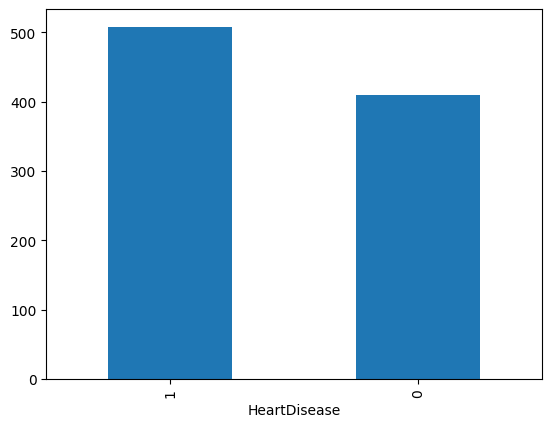

In [11]:
df['HeartDisease'].value_counts().plot(kind='bar')

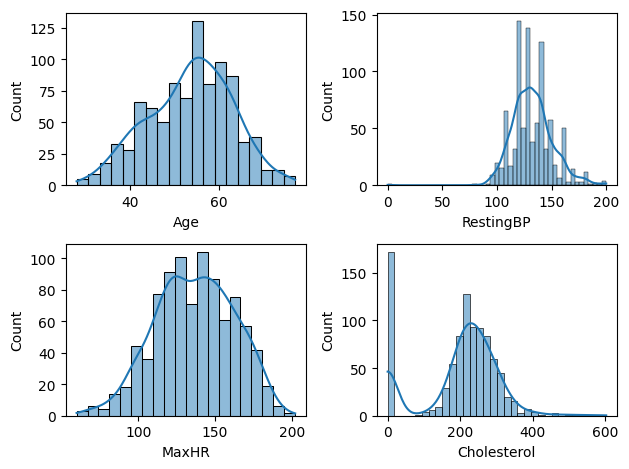

In [16]:
def plotting(var,num):
    plt.subplot(2,2,num)#divide cavas in 2by 2 grid  num to select plot
    sns.histplot(df[var],kde=True)
plotting('Age',1)
plotting('RestingBP',2)
plotting('MaxHR',3)
plotting('Cholesterol',4)
plt.tight_layout()


In [20]:
#its is not possible that resting bp is not zero it show in graph
#same in choratorl
#now clean the data
ch_mean=df.loc[df['Cholesterol']!=0,'Cholesterol'].mean()
ch_mean

np.float64(244.6353887399464)

In [ ]:
df['Cholesterol']=df['Cholesterol'].replace(0,ch_mean)
df['Cholesterol']=df['Cholesterol'].round(2)
df['Cholesterol']

0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
       ...  
913    264.0
914    193.0
915    131.0
916    236.0
917    175.0
Name: Cholesterol, Length: 918, dtype: float64

In [22]:
RS_mean=df.loc[df['RestingBP']!=0,'RestingBP'].mean()

df['RestingBP']=df['RestingBP'].replace(0,RS_mean)
df['RestingBP']=df['RestingBP'].round(2)
df['RestingBP']

0      140.0
1      160.0
2      130.0
3      138.0
4      150.0
       ...  
913    110.0
914    144.0
915    130.0
916    130.0
917    138.0
Name: RestingBP, Length: 918, dtype: float64

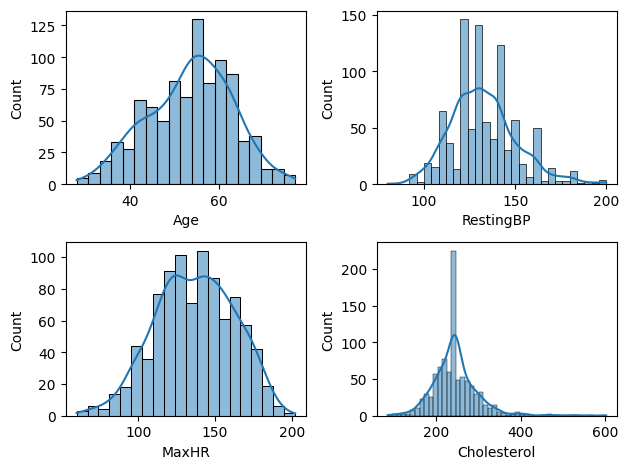

In [23]:
plotting('Age',1)
plotting('RestingBP',2)
plotting('MaxHR',3)
plotting('Cholesterol',4)
plt.tight_layout()